# Tutorial 6 - Sieci neuronowe

## 1) Sieci MLP - multi-layer perceptron
### 1.1) Zasada działania

MLP (perceptron wielowarstwowy) jest algorytmem _uczenia nadzorowanego_. Dla danego zbioru wektorów cech X oraz wektora odpowiedzi y trenuje on _nieliniową_ fukcję $f: R^m \rightarrow R^o$, gdzie $m$ jest liczbą wymiarów wektorów wejściowych a $o$ liczbą wymiarów wektorów wyjściowych. Może być ona używana zarówno do rozwiązywania problemów klasyfikacji, jak i regresji.

Trenowana funkcja $f$ ma postać kilkuwarstwowej sieci. Każda warstwa złożona jest z pewnej ilości neuronów. Pierwsza warstwa jest _warstwą wejściową_, złożoną z $m$ neuronów. Kolejne warstwy złożone są z pewnej ilości neuronów, których wartości zależą od wartości w poprzedniej warstwie. Ostatnia warstwa - _warstwa wyjściowa_ - składa się z $o$ neuronów. Warstwy pomiędzy warstwą wejściową i wyjściową nazywamy _warstwami ukrytymi_. Wartość funkcji $f$ dla wektora $x \in R^m$ jest wartość neuronów wyjściowych dla wartości neuronów wejściowych równej $x$.

<img src="images/multilayerperceptron_network.png" style="width: 350px; text-align: left" />
Rysunek 1: sieć multi-layer perceptron (źródło: https://scikit-learn.org)

Wartość neuronu w warstwie wejściowej zależy od danych wejściowych. Wartość neuronu w warstwach ukrytych i warstwie wyjściowej zależy od sumy ważonej (kombinacji liniowej) wartości neuronów i dodatkowej wartości - bias'u. Dodatkowo, najlepiej aby wartość neuronu $\in [0, 1]$. W tym celu:
* dla _warstwy wejściowej_ - normalizujemy dane
* dla _warstw ukrytych_ i _warstwy wyjściowej_ - obliczoną sumę przepuszczamy przez __funkcję aktywacji__, której dziedziną jest $R$ a zbiorem wartości jest $[0, 1]$ . Przykładową funkcją aktywacji jest sigmoid: $f(x) = (1 + e^{-x})^{-1}$. Wykresy funkcji aktywacji znajdują się poniżej:

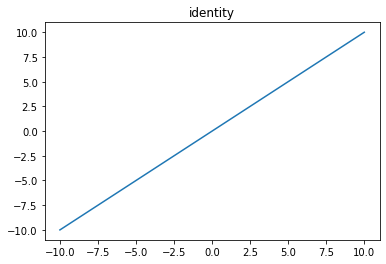

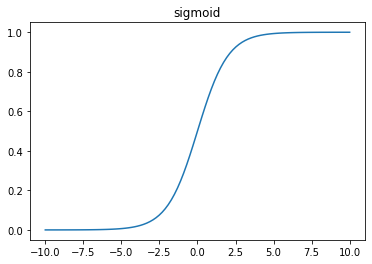

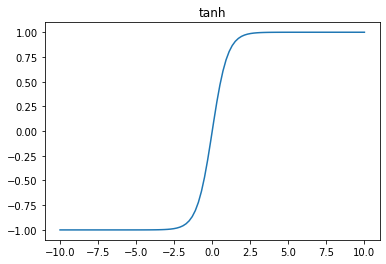

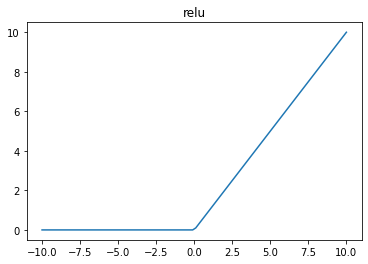

In [5]:
import math

import matplotlib.pyplot as plt
import numpy as np

def plot(f, title):
    x = np.linspace(-10, 10, 100)
    y = [f(i) for i in x]
    plt.plot(x, y)
    plt.title(title)
    plt.show()
    
plot(lambda x: x, 'identity')
plot(lambda x: 1 / (1 + math.exp(-x)), 'sigmoid')
plot(lambda x: math.tanh(x), 'tanh')
plot(lambda x: max(0, x), 'relu')


Wykresy funkcji aktywacji

Możemy zauważyć, że obliczenie wartości neuronów dla warstwy składa się z dwóch kroków:
1. _przekształcenie affiniczne_ wektora wartości neuronów z poprzedniej warstwy. Przekształcenie affiniczne jest to przekształcenie w postaci $x \rightarrow f(x) + b$, gdzie f jest przekształceniem liniowym a b wektorem przesunięcia.
2. obliczenie wartości poszczególnych neuronów na podstawie wartości wektora uzyskanych w punkcie (1) z użyciem funkcji aktywacji

Przekształcenie affiniczne wektora $X$ w $X'$ możemy zamienić w przekształcenie liniowe, dodając do wektora X dodatkową współrzędną o wartości 1. Umożliwia to dodanie stałego współczynnika do kombinacji liniowych - mnożąc wagę razy 1 otrzymamy zawsze daną wagę (patrz rysunek 1). Dzięki temu, możemy przedstawić współczynniki w postaci macierzy przekształcenia liniowego, a samo przekształcenie zrealizować jako mnożenie macierzy przez wektor.

### 1.2) Trenowanie sieci
Parametrami funkcji f, które trenujemy, są:
* wagi średniej ważonej (`coefs_`) - dla każdego neuronu w warstwie $l$ wag jest tyle, ile neuronów w warstwie $l - 1$,
* bias'y (`intercepts_`) - po jednym dla każdego neuronu.

Jeśli ilość neuronów w warstwie l oznaczymy jako $n_l$, dla każdej warstwy mamy $(n_{l - 1} + 1) n_l$ wartości do wyznaczenia. Jeśli mamy L warstw w naszej sieci MLP, mamy $\sum_{l=2}^{L} ((n_{l - 1} + 1) n_l)$ wartości do wyznaczenia.

Trenowanie sieci neuronowej polega na minimalizacji funkcji strat (loss function) na danym zbiorze treningowym, wyrażającej "koszt" sieci neuronowej. Standardowo używa się sumy błędów średniokwadratowych pomiędzy wynikami sieci neuronowej a wartościami oczekiwanymi dla kolejnych wektorów wejściowych. Parametrami funkcji loss są wszystkie parametry (wagi średnich ważonych oraz bias'y) naszej sieci neuronowej. Ilość tych parametrów jest bardzo duża, dlatego nie stosuje się standardowej metody wyznaczania ekstremów funkcji wielu zmiennych (przyrównywanie pochodnych cząstkowych do zera). Zamiast tego, istnieją specjalne metody:
* `sgd` - schotastic gradient descent
* `adam` - another schotastic gradient descent
* `lbfgs` - another optimizer

Więcej informacji na temat tych metod znajduje się na wykładzie oraz prezentacji do tego tutoriala.

Na kanale 3blue3brown w serwisie YouTube znajduje się 4-odcinkowa seria ilustrująca działanie sieci neuronowej MLP z użyciem schotastic gradient descent na zbiorze MNIST - https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi.

### 1.3) Przykład
Na potrzeby tego tutoriala, wykorzystamy bibliotekę `scikit-learn`. Wykorzystuje ona jedynie CPU, przez co nie nadaje się do zastosowań o dużej skali. Obliczenia związane z sieciami neuronowymi dziś wykorzystuje się zazwyczaj z użyciem GPU lub specjalizowanych układów stworzonych do tego celu (np. opartych na FPGA lub będących częściami nowoczesnych układów SoC w smartfonach). Biblioteki takie jak `tensorflow`, `keras` bądź `pytorch` umożliwiają działania na sieciach neuronowych z wykorzystaniem GPU.

Działanie sieci MLP pokażemy standardowo na zbiorze `MNIST`:

In [2]:
import tensorflow as tf # korzystamy jedynie w celu pobrania zbioru MNIST

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

Biblioteka `scikit-learn` udostępnia klasę `MLPClassifier`, implementującą algorytm MLP używający backpropagation do trenowania.

Konstruktor klasy `MLPClassifier` pozwala na ustawienie wielu parametrów, ich pełna lista dostępna jest w dokumentacji `scikit-learn`. Najważniejsze z nich to:
* __solver__ - metoda użyta do trenowania sieci. Dostępne metody: `"sgd"`\\`"adam"`\\`"lbfgs"`
* __hidden_layer_sizes__ -  lista rozmiarów warstw ukrytych
* __activation__ - użyta funkcja aktywacji. Dostępne funkcje aktywacji:
    * `'identity'` - funkcja tożsamościowa
    * `'logistic'` - sigmoid
    * `'tanh'` - tangens hiperboliczny
    * `'relu'` - $f(x) = max(0, x)$
* __alpha__ - wartość parametru regularyzacji - pozwala na ograniczanie rozmiaru wag. Odpowiednie dobranie tego parametru pozwala na ograniczenie overfittingu/underfittingu.
* __random_state__ - seed funkcji losowej, użytej do generowania wag. Aby wszystkie sieci miały początkowo takie same wagi, wartość parametru random_state musi być jednakowa.
* __max_iter__ - maksymalna ilość iteracji trenowania

In [3]:
SEED = 6

Klasy `MLPClassifier` używamy podobnie, jak innych klasyfikatorów będących częścią biblioteki sklearn.

In [4]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    solver='sgd', 
    hidden_layer_sizes=(50,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=10,
    max_iter=100
)
clf.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 1.37862516
Iteration 3, loss = 1.20039818
Iteration 4, loss = 0.97592918
Iteration 5, loss = 0.83241901
Iteration 6, loss = 0.71702534
Iteration 7, loss = 0.67166795
Iteration 8, loss = 0.64378692
Iteration 9, loss = 0.61193826
Iteration 10, loss = 0.59202780
Iteration 11, loss = 0.57581110
Iteration 12, loss = 0.55843697
Iteration 13, loss = 0.54766030
Iteration 14, loss = 0.53767815
Iteration 15, loss = 0.52759861
Iteration 16, loss = 0.51978973
Iteration 17, loss = 0.51145313
Iteration 18, loss = 0.50635787
Iteration 19, loss = 0.49765920
Iteration 20, loss = 0.49205325
Iteration 21, loss = 0.48820302
Iteration 22, loss = 0.48018997
Iteration 23, loss = 0.47664894
Iteration 24, loss = 0.47223442
Iteration 25, loss = 0.46736041
Iteration 26, loss = 0.46215927
Iteration 27, loss = 0.46166783
Iteration 28, loss = 0.45560854
Iteration 29, loss = 0.45351578
Iteration 30, loss = 0.44698635
Iteration 31, loss = 0.44518321
Iteration 32, loss = 0.4

/Users/damian/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=6, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

Używając zbioru testowego MNIST sprawdźmy, ile wynosi accuracy score naszego modelu.

In [5]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
y_test
accuracy_score(y_test, y_pred)

0.9094

Obiekty klasy `MLPClassifier` udostępniają m. in. następujące atrybuty:
* `loss_` - obecna wartość funkcji loss
* `coefs_` - lista macierzy wag dla poszczególnych warstw
* `intercepts_` - lista wektorów bias dla poszczególnych warstw

In [6]:
clf.loss_

0.29719460013812377

Wyświetlmy wartości współczynników macierzy wag dla niektórych neuronów w warstwie ukrytej w postacji obrazków:

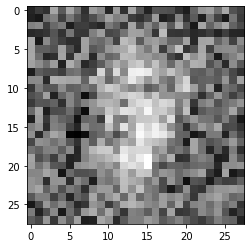

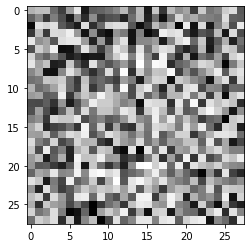

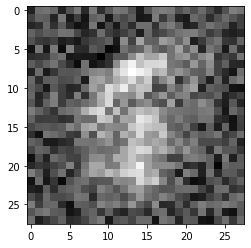

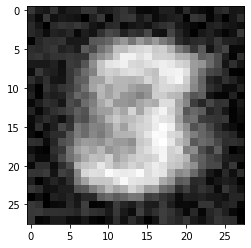

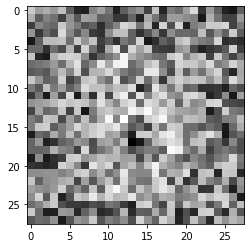

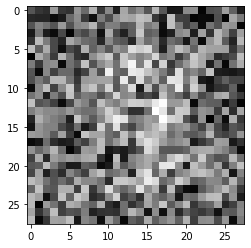

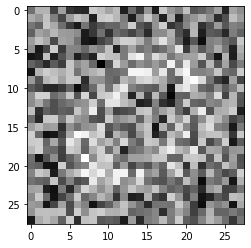

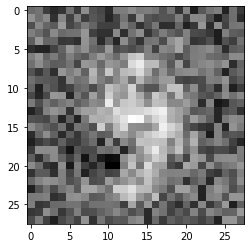

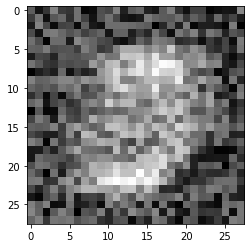

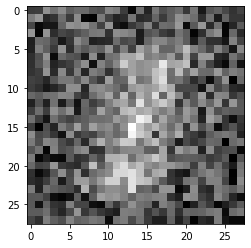

In [7]:
for i in range(10):
    coefs = clf.coefs_[0][:,i]
    coefs = coefs.reshape(28, 28)
    plt.imshow(coefs, cmap='Greys')
    plt.show()

Możemy zauważyć, że dla _większości_ obrazków wagi macierzy aktywacji nie reprezentują konkretnych kształtów.

Wyświetlmy dodatkowo wartości bias dla tych neuronów:

In [8]:
clf.intercepts_[0][:10]

array([ 0.07642884, -0.01604359, -0.06877835, -0.04130371,  0.01280611,
       -0.07110658, -0.03079   , -0.084265  , -0.03832847,  0.0819824 ])

### 1.4) Zadanie

Pokazać jak zmiany parametrów sieci (wielkość sieci dobrać do wielkości danych i możliwości obliczeniowych) tj.
optymalizator, regularyzacja (np., drop-out), funkcja aktywacji i inne wpływa na wynik.
Ważne: __sieć ma być trenowana dla identycznych wag początkowych__ (należy użyć sieci o takim samym rozmiarze i zanicjować sieć z użyciem takiego samego seed'a (parametr `random_state`). 
W sprawozdaniu należy umieścić tabelkę zawierającą rezultaty i wnioski.

| solver | hidden_layers_sizes | activation | alpha | (other params...) | loss | accuracy_score |
|--------|---------------------|------------|-------|-------------------|------|----------------|
|        |                     |            |       |                   |      |                |
|        |                     |            |       |                   |      |                |
|        |                     |            |       |                   |      |                |

In [9]:
# rozwiązanie zadania

# 2) Wpływ długości uczenia sieci na błąd

Zmierzmy dokładność naszej sieci w zależności od długości uczenia. W przypadku stochastycznych solverów (sgd, adam) parametr max_iter oznacza liczbę epok. Jeżeli chcemy użyć innego solvera musimy wyznaczyć odpowiednie batch_size oraz max_iter. Czym jest batch size oraz iteracja w ogólności: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

In [10]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [11]:
from sklearn.utils import resample

X_train, y_train = resample(X_train, y_train, random_state=0, n_samples=200)

In [12]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start_iter = 10 # startowa ilość iteracji
max_iters = 301  # maksymalna ilość iteracji
step_size = 10   

scores = pd.DataFrame(columns=['n_iters', 'test_score', 'loss'])

for max_iter in range(start_iter, max_iters + 1, step_size):
    clf = MLPClassifier(activation='relu', 
                        hidden_layer_sizes=(512, 256, 128,), # ity element odpowiada wielkości itej warstwy
                        solver='sgd',
                        random_state=0, 
                        max_iter=max_iter, # w przypadku solvera innego niż sgd lub adam trzeba odpowiednio przeliczyć ilość iteracji oraz dodać parametr batch_size
                        learning_rate='adaptive',
                        alpha=1e-4
                       )
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    row = {
        'n_iters': clf.n_iter_,
        'max_iter': max_iter,
        'train_score': accuracy_score(y_train, y_train_pred),
        'test_score': accuracy_score(y_test, y_pred),
        'loss': clf.loss_
    }
    scores = scores.append(row, ignore_index=True)
                    
scores
                        

/Users/damian/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/damian/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/damian/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/damian/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the op

,n_iters,test_score,loss,max_iter,train_score
0,10.0,0.1045,34.897361,10.0,0.145
1,20.0,0.5005,1.019064,20.0,0.740
2,30.0,0.6191,0.198626,30.0,0.965
3,40.0,0.6494,0.071623,40.0,0.990
4,50.0,0.6608,0.035965,50.0,0.995
5,60.0,0.6677,0.021763,60.0,0.995
6,70.0,0.6695,0.014912,70.0,1.000
7,80.0,0.6701,0.011097,80.0,1.000
8,90.0,0.6707,0.008727,90.0,1.000
9,100.0,0.6728,0.007231,100.0,1.000


Najpierw sprawdźmy jak wygląda ```Accuracy Score``` na zbiorze testowym

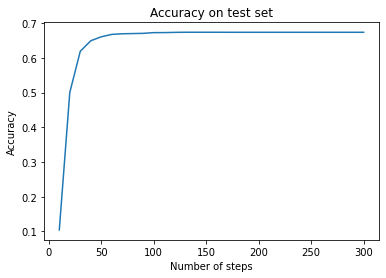

In [13]:
import matplotlib.pyplot as plt

plt.xlabel("Number of steps")
plt.ylabel("Accuracy")
plt.title("Accuracy on test set")
plt.plot(scores['max_iter'], scores['test_score'])
plt.show()

Po ~70 krokach ```Accuracy Score``` przestaje rosnąć. Sprawdźmy zatem jak wygląda ```Accuracy Score``` na zbiorze trzeningowym.

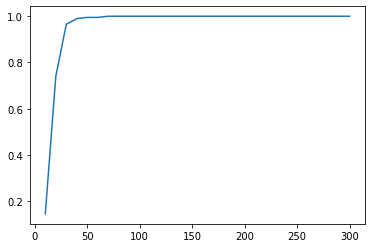

In [14]:
plt.plot(scores['max_iter'], scores['train_score'])

W przypadku zbioru testowego model osiąga prawie 100% skuteczność na samym sobie po ~40 krokach. Po 70 krokach model zna siebie na pamięć przez co nie może się niczego więcej nauczyć. Następuje underfitting- potrzebujemy zwiększyć zbiór treningowy, żeby osiągnął lepsze wyniki.

# 3) Sieci konwolucyjne - Convolutional Neural Network

Sieci konwolucyjne to podklasa sieci neuronowych. Z natury świetnie nadają się do klasyfikacji obrazów oraz wyszukiawania wzroca w obrazie. Ich budowę można podzielić na dwie głównie warstwy:
- warstwa konwolucji
- warstwa sieci neuronowej


Warstwa sieci neuronowej to Fully Connected Network, czyli poznana wcześniej sieć MLP.  
Warstwa konwolucji składa się z 3 etapów:
1. Konwolucji właściwej
2. Operacji ReLU (Rectified Linear Unit)
3. Poolingu


Warstwa konwolucji może być powtórzona wielokrotnie.
Większość frameworków posiada gotowe narzędzia do budowy sieci konwolucyjnych. Poniżej spróbujemy zbudować warstwę konwolucji od zera, aby zobaczyć na czym to polega.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=748)

### 3.1) Konwolucja

Operacja konwolucji jest operacją filtrowania (splotu). Operacja ta przyjmuje na wejściu dwie macierze:

- Macierz $I_{MxN}$ reprezentującą obraz. Dla uproszczenia rozważamy jedynie obrazy w 256 odcieniach szarości. Każdy element macierzy $I$ jest więc liczbą całkowitą z zakresu 0 do 255.
- Macierz $K_{c×c}$, gdzie $c < M$ oraz $c < N$ reprezentującą filtr. Elementami tej macierzy są liczby zmiennoprzecinkowe (często ujemne).

Operacja filtrowania tworzy nowy obraz $J$, którego piksele mają wartość:

$J[x,y]=s_{x, y}$


$s_{x,y}=\sum_{i=1}^{c} \sum_{j=1}^{c}I[x + i - ceil(c/2), y + j - ceil(c/2)]∗k[i,j]$

Powstawły obraz będzie odpowiednio mniejszy, zależnie od wielkości $c$. Indeksowanie w powyższych wzorach zaczyna się od 1.

Konwolucja jest operacją liniową wykonywaną na macierzy, polegającą na aplikacji pewnego filtru, zwanego kernelem. 
![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196)

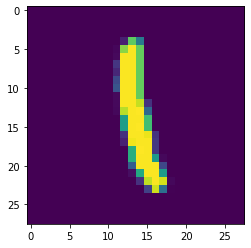

In [15]:
img = X_train[3].reshape(28, 28)
plt.imshow(img)

Zadeklarujmy filtry pierwszej wartswy konwolucyjnej.

In [16]:
l1_filter = np.zeros((2,3,3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],   
                                   [-1, 0, 1],   
                                   [-1, 0, 1]]])  
l1_filter[1, :, :] = np.array([[[1,   1,  1],   
                                   [0,   0,  0],   
                                   [-1, -1, -1]]])

In [17]:
def conv(img, conv_filter):
    if len(img.shape) != len(conv_filter.shape) - 1: # Check whether number of dimensions is the same
        print("Error: Number of dimensions in conv filter and image do not match.")  
        return 
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            return
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        return
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        return

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in np.uint16(np.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

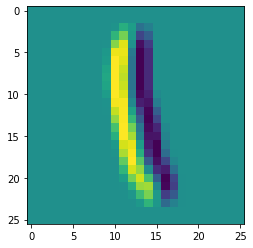

In [18]:
l1_feature_map = conv(img, l1_filter)
plt.imshow(l1_feature_map[:, :, 0])

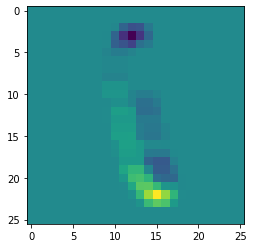

In [19]:
plt.imshow(l1_feature_map[:, :, 1])

### 3.2 ReLU

Operacja konwolucji jest liniowa (mnożenie macierzy oraz sumwanie), co niekonieczenie jest przez nas porządane przy uczeniu sieci neuronowej, gdzie dane wejściowe nie są liniowe. Z pomocą przchodzi prosta funkcja ReLU opisana wzorem $Output = max(0, Input)$, gdzie $Input$ to wartość piksela wynikowej macierzy po zaaplikowaniu filtrów
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-2-23-48-am.png?w=537&h=168)

In [20]:
def relu(feature_map):  
    relu_out = np.zeros(feature_map.shape)  
    for map_num in range(feature_map.shape[-1]):  
        for r in np.arange(0,feature_map.shape[0]):  
            for c in np.arange(0, feature_map.shape[1]):  
                relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num], 0])
    return relu_out

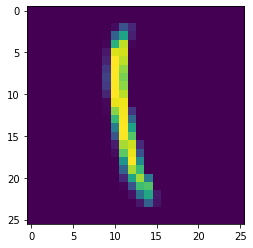

In [21]:
l1_feature_map_relu = relu(l1_feature_map)
plt.imshow(l1_feature_map_relu[:, :, 0])

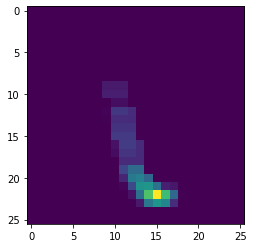

In [22]:
plt.imshow(l1_feature_map_relu[:, :, 1])

Inną funkcją do konwersji danych w nieliniowe, jest poznana wcześniej funkcja sigmoid, jednak ReLU uznawane jest za najlepszą ze względu na wyniki poparte badaniami.

### 3.3 Pooling

Pooling zwany również subsampling lub downsampling jest operacją zmniejszającą ilość rozmiar otrzymanej feature mapy. Rozpatruje się 3 głównie metody pooling:
- Max
- Average
- Sum

Metod tych może być oczywiście więcej.

Operacja jest dosyć intuicyjna. Dzielimy Macierz na podmacierze, na których aplikujemy funkcję poolingu, która zwróci nam w zależności od wybranej metody skalar. W ten sposób uzyskamy mniejszą macież.
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=494)

In [23]:
def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride+1),
                            np.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

(13, 13, 2)

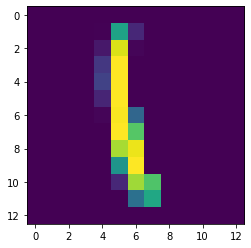

In [24]:
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
plt.imshow(l1_feature_map_relu_pool[:, :, 0])
l1_feature_map_relu_pool.shape

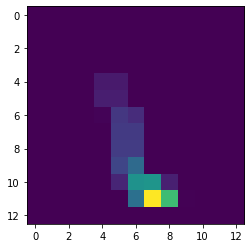

In [25]:
plt.imshow(l1_feature_map_relu_pool[:, :, 1])

Na koniec możemy dodać kolejne warstwy konwolucyjne. Z powodu niwielkich rozmiarów obrazka ograniczymy się do dwóch warstw

In [26]:
l1_feature_map_relu_pool.shape

(13, 13, 2)

In [27]:
l2_filter = np.random.rand(16, 3, 3, l1_feature_map_relu_pool.shape[-1])
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
l2_feature_map_relu = relu(l2_feature_map)
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)

(6, 6, 16)

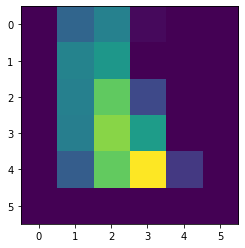

In [28]:
plt.imshow(l2_feature_map_relu_pool[:, :, 0])
l2_feature_map_relu_pool.shape

### 3.4 CNN w Tensorflow

Powyższe kroki wykorzystamy do stworzenia sieci CNN

In [29]:
from tensorflow.keras import models, layers, utils

model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [30]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 521us/sample - loss: 0.6371 - accuracy: 0.8113 - val_loss: 0.1581 - val_accuracy: 0.9551
Epoch 2/10
60000/60000 [==============================] - 30s 495us/sample - loss: 0.1441 - accuracy: 0.9564 - val_loss: 0.0967 - val_accuracy: 0.9705
Epoch 3/10
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0984 - accuracy: 0.9697 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 4/10
60000/60000 [==============================] - 29s 486us/sample - loss: 0.0771 - accuracy: 0.9758 - val_loss: 0.0583 - val_accuracy: 0.9807
Epoch 5/10
60000/60000 [==============================] - 30s 508us/sample - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.0559 - val_accuracy: 0.9813
Epoch 6/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0450 - val_accuracy: 0.9853
Epoch 7/10
60000/60000 [====================

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03636042181625962
Test accuracy: 0.988


### 3.5 Zadanie dla studentów

Pokazać jak zmiany parametrów sieci (wielkość sieci dobrać do wielkości danych i możliwości obliczeniowych) tj.
ilość wartsw konwolucyjnych, wielkości kerneli, metoda poolingu.
Ważne: __sieć ma być trenowana dla identycznych wag początkowych__ (należy użyć sieci o takim samym rozmiarze i zanicjować sieć z użyciem takiego samego seed'a (parametr `random_state`). 
W sprawozdaniu należy umieścić tabelkę zawierającą rezultaty i wnioski.

| kernel_sizes | activation | pooling | (other params...) | loss | accuracy_score |
|---------------------|------------|-------|-------------------|------|----------------|
|                     |            |       |                   |      |                |
|        |                     |            |       |                   |      |                |
|        |                     |            |       |                   |      |                |


# 4. Zadanie dla studentów

Wnioski z porównania sieci MLP i CNN.
Która otrzymuje lepsze wyniki i dlaczego.

# 5. Zadanie dla studentów

Na zbiorze FMNIST i 20NG (TNG) (można dokonać zmniejszenia ilości wymiarów używając
PCA) porównać performance sieci MLP i CNN w funkcji ilości warstw. Zaczynamy od
jednowarstwowej sieci MLP i minimalnej sieci CNN o porównywalnych ilościach wag.
Następnie zwiększamy liczbę warstw zakładając, że ilość wag jest podobna jak dla
początkowej konfiguracji. WNIOSKI.
Wyniki dokładności porównać do najlepszego modelu klasycznego.